### MiniProject - 1

##### Group C - 2 : Use the following dataset and classify tweets into positive and negative tweets.
https://www.kaggle.com/ruchi798/data-science-tweets

In [4]:
import pandas as pd
df = pd.read_csv('data_visualization.csv', low_memory=False)

In [5]:
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1406335989484822531,1406335989484822531,2021-06-20 01:10:03 IST,2021-06-20,01:10:03,530,16264836,apress,Apress,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1406292636789526537,1406292636789526537,2021-06-19 22:17:46 IST,2021-06-19,22:17:46,530,17818254,careersherpa,Hannah Morgan,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1406082288035811330,1406082288035811330,2021-06-19 08:21:55 IST,2021-06-19,08:21:55,530,15808647,techreview,MIT Technology Review,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1405948260796100610,1405948260796100610,2021-06-18 23:29:21 IST,2021-06-18,23:29:21,530,366154590,gurmanbhatia,Gurman Bhatia,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1405942146960613376,1405942146960613376,2021-06-18 23:05:03 IST,2021-06-18,23:05:03,530,239971233,cdcinjury,CDC Injury Center,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33585,7421815845,7421815845,2010-01-06 06:13:47 IST,2010-01-06,06:13:47,530,12486322,harishpillay,harish,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
33586,7416719938,7416719938,2010-01-06 03:24:09 IST,2010-01-06,03:24:09,530,16112517,eagereyes,Robert Kosara 👁📺,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
33587,7411837095,7411837095,2010-01-06 00:29:44 IST,2010-01-06,00:29:44,530,7383992,bradbaumn,Brad Bauman,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
33588,7404260176,7404260176,2010-01-05 19:45:15 IST,2010-01-05,19:45:15,530,19622847,akamai,Akamai Technologies,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33590 entries, 0 to 33589
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               33590 non-null  int64  
 1   conversation_id  33590 non-null  int64  
 2   created_at       33590 non-null  object 
 3   date             33590 non-null  object 
 4   time             33590 non-null  object 
 5   timezone         33590 non-null  int64  
 6   user_id          33590 non-null  int64  
 7   username         33590 non-null  object 
 8   name             33590 non-null  object 
 9   place            85 non-null     object 
 10  tweet            33590 non-null  object 
 11  language         33590 non-null  object 
 12  mentions         33590 non-null  object 
 13  urls             33590 non-null  object 
 14  photos           33590 non-null  object 
 15  replies_count    33590 non-null  int64  
 16  retweets_count   33590 non-null  int64  
 17  likes_count 

In [7]:
df['tweet'][10]

'We are pleased to invite you to the EDHEC DataViz Challenge grand final for a virtual exchange with all Top 10 finalists to see how data visualization creates impact and can bring out compelling stories in support of @UNICEF’s mission.  https://t.co/Vbj9B48VjV'

In [9]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import re
import pandas as pd
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [10]:
sid

In [14]:
sentence = df['tweet'][0]
sid.polarity_scores(sentence)['compound']

0.7089

In [15]:
import re
import nltk
from nltk.corpus import words

word_list = set(words.words()) 

def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+", "", tweet)  # Remove @ mentions
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)  # Remove URLs
    tweet = " ".join(tweet.split())  # Remove extra spaces
    tweet = tweet.replace("#", "").replace("_", " ")  # Remove hashtags and underscores

    tweet = " ".join(
        w for w in nltk.wordpunct_tokenize(tweet)
        if w.lower() in word_list or not w.isalpha()
    )
    return tweet

df['tweet_clean'] = df['tweet'].apply(cleaner)


In [16]:
# Define custom sentiment dictionary
word_dict = {
    'manipulate': -1,
    'manipulative': -1,
    'jamescharlesiscancelled': -1,
    'jamescharlesisoverparty': -1,
    'pedophile': -1,
    'pedo': -1,
    'cancel': -1,
    'cancelled': -1,
    'cancel culture': 0.4,
    'teamtati': -1,
    'teamjames': 1,
    'teamjamescharles': 1,
    'liar': -1
}

# Initialize the analyzer and update the lexicon
sid = SentimentIntensityAnalyzer()
sid.lexicon.update(word_dict)

# Apply compound score to cleaned tweets
list1 = []
for i in df['tweet_clean']:
    score = sid.polarity_scores(str(i))['compound']
    list1.append(score)

# store the results in a new column
df['sentiment_score'] = list1

In [29]:
df['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    if sentiment > 0:
        return 'positive'
    elif sentiment == 0:
        return 'neutral'
    else:
        return 'negative'

df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

In [30]:
df = df[['tweet','date','id','sentiment','sentiment_category']]
df.head()

,tweet,date,id,sentiment,sentiment_category
0,Take your storytelling to the next level using...,2021-06-20,1406335989484822531,0.7089,positive
1,Choosing Fonts for Your Data Visualization | b...,2021-06-19,1406292636789526537,0.0000,neutral
2,This data visualization shows where our greate...,2021-06-19,1406082288035811330,0.0000,neutral
3,Looking for examples of stellar charts made so...,2021-06-18,1405948260796100610,0.4019,positive
4,"With #WISQARS Data Visualization, you can disp...",2021-06-18,1405942146960613376,-0.4215,negative


In [31]:
neg = df[df['sentiment_category']=='negative']
neg = neg.groupby(['date'],as_index=False).count()
pos = df[df['sentiment_category']=='positive']
pos = pos.groupby(['date'],as_index=False).count()
pos = pos[['date','id']]
neg = neg[['date','id']]

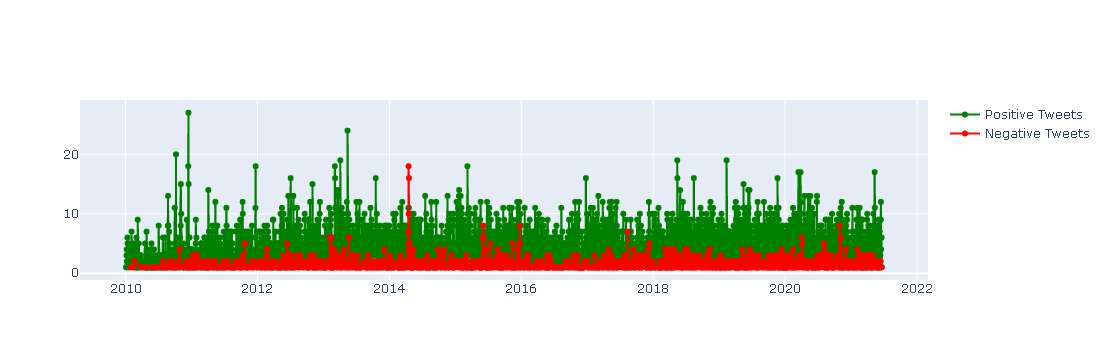

In [36]:
import plotly.graph_objs as go

# Create figure
fig = go.Figure()

# Assuming pos and neg are filtered DataFrames like:
# pos = df[df['sentiment_category'] == 'positive']
# neg = df[df['sentiment_category'] == 'negative']

# Plot positive tweets
fig.add_trace(go.Scatter(
    x=pos['date'],
    y=pos['id'],
    name='Positive Tweets',
    mode='markers+lines',
    line=dict(shape='linear', color='green'),
    connectgaps=True
))

# Plot negative tweets
fig.add_trace(go.Scatter(
    x=neg['date'],
    y=neg['id'],
    name='Negative Tweets',
    mode='markers+lines',
    line=dict(shape='linear', color='red'),
    connectgaps=True
))

# Show the figure
fig.show()